# Sales Trends Analysis

**Objective** <br>
Analyze sales performance over time to identify growth patterns, seasonality,
and potential anomalies using Gold-layer data.

In [47]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

In [48]:
import importlib

import src.metrics as mt
import src.common as co
import src.visualization as vs

importlib.reload(mt)
importlib.reload(co)
importlib.reload(vs)

<module 'src.visualization' from 'C:\\Users\\TUF\\OneDrive\\Documents\\Code\\Vs Code\\sales_analytics\\src\\visualization.py'>

In [49]:
sales_mart = co.fact_sales()
skpi = mt.SalesKPIs(sales_mart)

#### High-Level KPIs

In [8]:
vs.sales_kpis(sales_mart)

,KPIs,Values
0,Total Orders,27.7K
1,Total Revenue,29.4M
2,Total Quantity,60.4K
3,Average Order Value,1.1K
4,Average Order Quantity,2.2
5,Average Shipping Time,7 days 00:00:00
6,Average Delivery Time,12 days 00:00:00
7,Average Shipping to Delivery Time,5 days 00:00:00


#### Revenue by Year

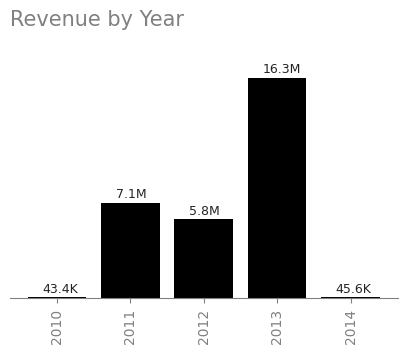

In [205]:
df = skpi.revenue_by_year()
x = df['year'].apply(lambda x: str(x))
vs.ColumnPlotLabel(
    x=x,
    y1=df['total_revenue'], 
    y2=.2,
    y3= 400000,
    title='Revenue by Year',
    fsize=(5,3)).decoration()

#### Revenue by Month

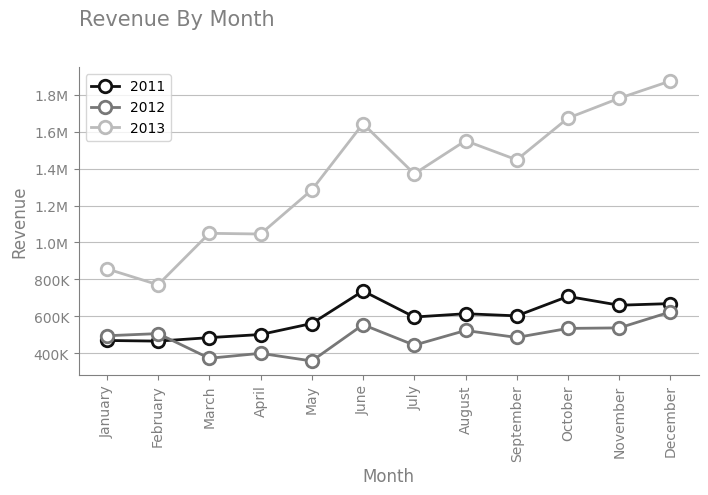

In [106]:
df = skpi.revenue_by_month()
vs.LinePlot(
    x=df['month_name'],
    y1=df[2011],
    y2=df[2012],
    y3=df[2013],
    title='Revenue By Month',
    xlable='Month',
    ylable='Revenue',
    label1='2011',
    label2='2012',
    label3='2013',
    legend=True,
    fsize=(8,4)).decoration()

#### Profit by Year

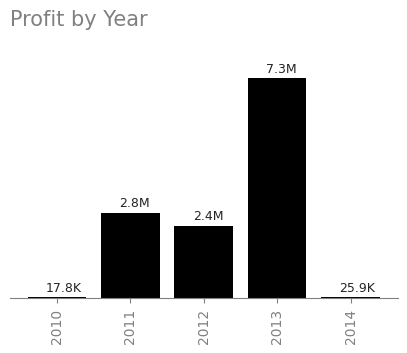

In [42]:
df = skpi.profit_by_year()
x = df['year'].apply(lambda x: str(x))
vs.ColumnPlotLabel(
    x=x,
    y1=df['profit'], 
    y2=.15,
    y3= 200000,
    title='Profit by Year',
    fsize=(5,3)).decoration()

#### Profit by Month

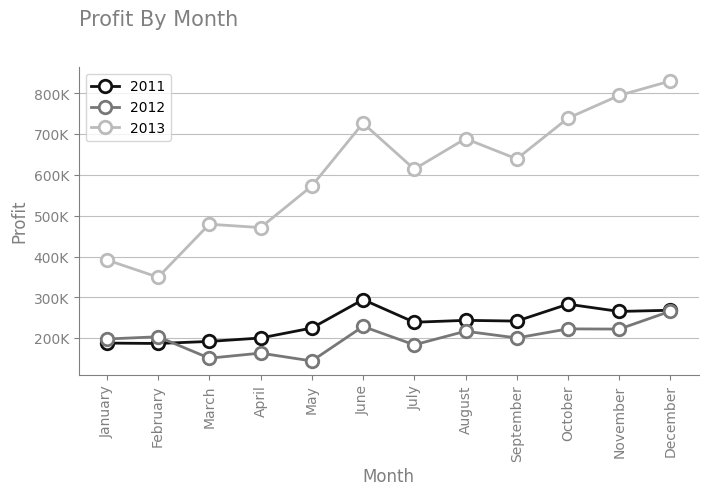

In [189]:
df = skpi.profit_by_month()
vs.LinePlot(
    x=df['month_name'],
    y1=df[2011],
    y2=df[2012],
    y3=df[2013],
    title='Profit By Month',
    xlable='Month',
    ylable='Profit',
    label1='2011',
    label2='2012',
    label3='2013',
    legend=True,
    fsize=(8,4)).decoration()

#### YoY Groth (Revenue)

In [44]:
skpi.yoy_growth_r()

,year,yoy
1,2011,NaN
2,2012,-17.43
3,2013,179.85


#### Last Year MoM Groth (Revenue)

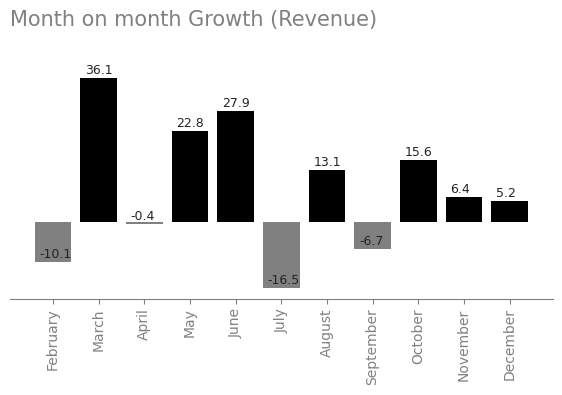

In [53]:
df = skpi.last_year_mom_growth_r()
vs.ColumnPlotLabel(
    x=df['month_name'],
    y1=df['mom'], 
    y2=.3,
    y3= 1,
    title='Month on month Growth (Revenue)',
    fsize=(7,3)).decoration()

#### YoY Groth (Profit)

In [50]:
skpi.yoy_growth_p()

,year,yoy
1,2011,NaN
2,2012,-15.10
3,2013,203.64


#### Last Year MoM Groth (Profit)

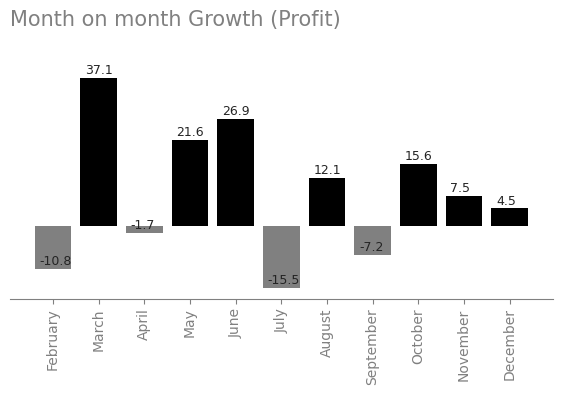

In [54]:
df = skpi.last_year_mom_growth_p()

vs.ColumnPlotLabel(
    x=df['month_name'],
    y1=df['mom'], 
    y2=.3,
    y3= 1,
    title='Month on month Growth (Profit)',
    fsize=(7,3)).decoration()